# Visualize the lncRNA expression data of five different cancer types using PCA.

In [1]:
#Import the lib and data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('E:/FIU/Int_ML/Jupyter/CSV/lncRNA_5_Cancers.csv')
df.keys()

Index(['Ensembl_ID', 'ENSG00000005206.15', 'ENSG00000083622.8',
       'ENSG00000088970.14', 'ENSG00000099869.7', 'ENSG00000100181.20',
       'ENSG00000104691.13', 'ENSG00000115934.11', 'ENSG00000117242.7',
       'ENSG00000118412.11',
       ...
       'ENSGR0000223511.4', 'ENSGR0000223571.4', 'ENSGR0000226179.4',
       'ENSGR0000230542.4', 'ENSGR0000234622.4', 'ENSGR0000236017.6',
       'ENSGR0000236871.5', 'ENSGR0000237531.4', 'ENSGR0000270726.4', 'Class'],
      dtype='object', length=12311)

In [2]:
A=df.keys()

In [3]:
#Filter out the data scent 
features=A[1:12310]

In [4]:
x = df.loc[:, features].values

In [5]:
y = df.loc[:,['Class']].values

In [6]:
#iport PCA
from sklearn.decomposition import PCA

In [7]:
#Set for two component
pca = PCA(n_components=2)

In [8]:
principalComponents = pca.fit_transform(x)

In [9]:
print(principalComponents)

[[-17.86479116  15.90450325]
 [ -8.68279103   9.63445037]
 [-20.86030903  16.12157817]
 ...
 [  5.36509754   9.65296029]
 [  6.44564502  10.17287416]
 [  6.48970116   9.30754958]]


In [10]:
PCA_1=principalComponents[:,0]

In [11]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['0', '1'])

In [12]:
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

In [13]:
finalDf.head()

,0,1,Class
0,-17.864791,15.904503,KIRC
1,-8.682791,9.634450,KIRC
2,-20.860309,16.121578,KIRC
3,-25.767978,19.649743,KIRC
4,-21.025951,13.430290,KIRC


<AxesSubplot:title={'center':'PCA Visualization'}, xlabel='PCA_1', ylabel='PCA_2'>

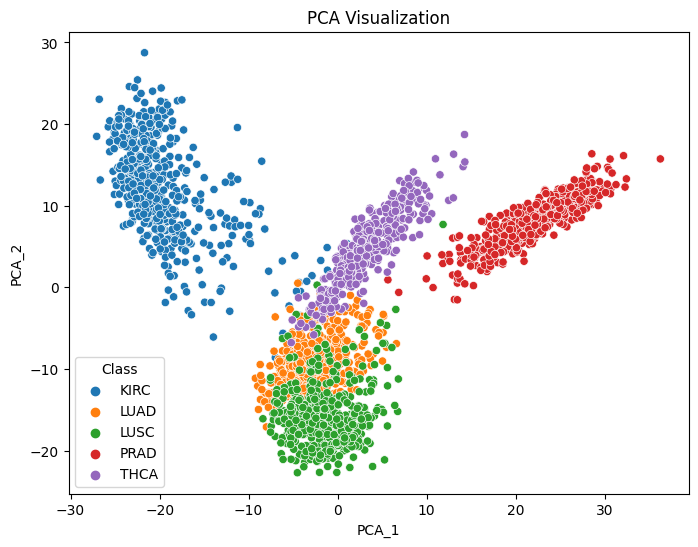

In [14]:
#ploting and get the output
plt.figure(figsize=(8,6))
#plt.xlim([-50,200])
#plt.ylim([-100,100])
plt.title("PCA Visualization")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
sns.scatterplot(data=finalDf,x="0",y="1",hue="Class")

# Two violon plots – one with the values of PC1 and the other with PC2.

<AxesSubplot:title={'center':'violon plots for PC2'}, xlabel='Class', ylabel='1'>

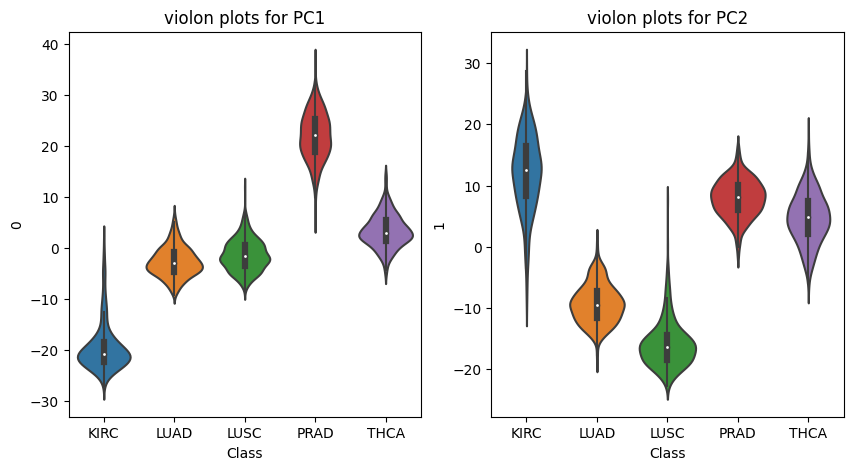

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("violon plots for PC1")
sns.violinplot(data=finalDf,x="Class",y="0")

plt.subplot(1,2,2)
plt.title("violon plots for PC2")
sns.violinplot(data=finalDf,x="Class",y="1")

# Visualize the lncRNA expression data of five different cancer types using t-SNE.

In [24]:
from sklearn.manifold import TSNE

In [25]:
X = df.loc[:, features].values
y = df.loc[:,['Class']].values

In [26]:
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape

c:\users\alif\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\users\alif\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(2529, 2)

In [27]:
tsne_result

array([[-22.11646 ,  39.80561 ],
       [ -9.021374,  43.077347],
       [-22.79785 ,  44.168217],
       ...,
       [ 22.292353,  15.220148],
       [ 21.549328,  28.957817],
       [ 21.716213,  29.875082]], dtype=float32)

In [28]:
tnDf = pd.DataFrame(data = tsne_result
             , columns = ['0', '1'])

In [29]:
tnDf.head()

,0,1
0,-22.116461,39.805611
1,-9.021374,43.077347
2,-22.797850,44.168217
3,-26.775412,40.730141
4,-26.454384,34.877064


In [32]:
TsnefinalDf = pd.concat([tnDf, df[['Class']]], axis = 1)

<AxesSubplot:title={'center':'Plots with tSNE'}, xlabel='tSNE 1st Component ', ylabel='tSNE 2nd Component'>

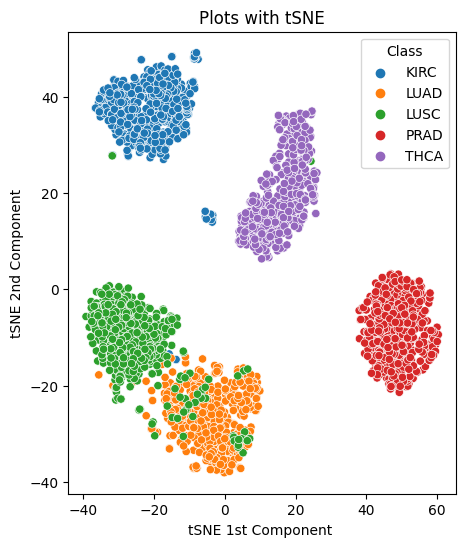

In [40]:
plt.figure(figsize=(4,6))
#plt.xlim([-50,200])
#plt.ylim([-100,100])
plt.title("Plots with tSNE")
plt.xlabel("tSNE 1st Component ")
plt.ylabel("tSNE 2nd Component")
sns.scatterplot(data=TsnefinalDf,x="0",y="1",hue="Class")

# Draw two violon plots – one with the values of t-SNE 1 and the other with tSNE 2.

<AxesSubplot:title={'center':'violon plots for tSNE 2'}, xlabel='Class', ylabel='1'>

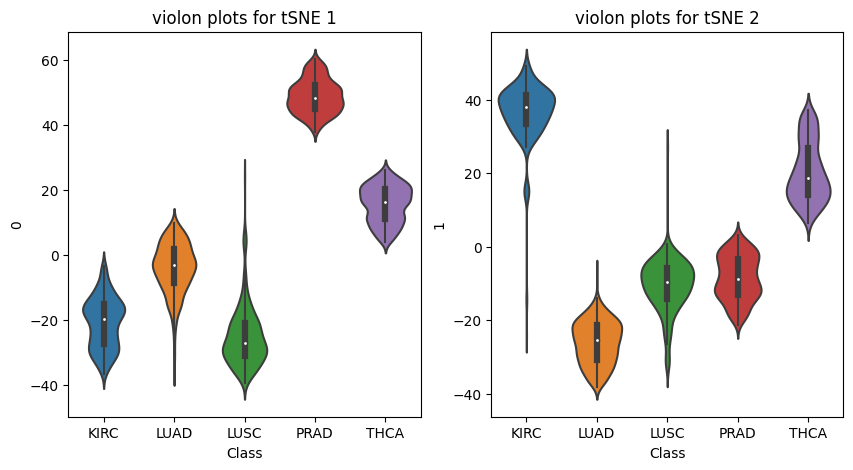

In [41]:
#ploting and get output
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("violon plots for tSNE 1")
sns.violinplot(data=TsnefinalDf,x="Class",y="0")
plt.subplot(1,2,2)
plt.title("violon plots for tSNE 2")
sns.violinplot(data=TsnefinalDf,x="Class",y="1")